In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Loading Dataset
data = pd.read_csv('book.csv')

In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
# checking the random entries in the data

data.sample(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
230,0,0,0,1,0,0,0,0,0,0,0
1549,0,0,0,0,0,0,0,0,0,0,1
1590,0,0,0,0,0,1,0,0,0,0,0
969,0,0,0,0,1,0,0,0,0,0,0
1382,0,0,0,0,0,0,0,0,0,0,0
1594,0,0,0,0,0,1,0,0,0,0,0
363,1,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,1,0,0,0,0,1
783,1,0,0,0,0,0,0,0,0,0,0
1037,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(2000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


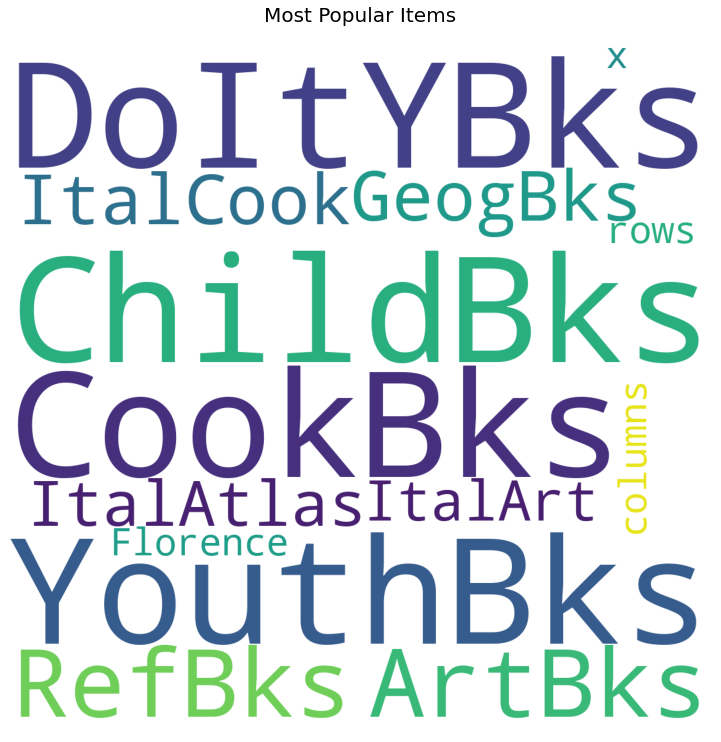

In [7]:
# Word cloud of most frequent books
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

<BarContainer object of 11 artists>

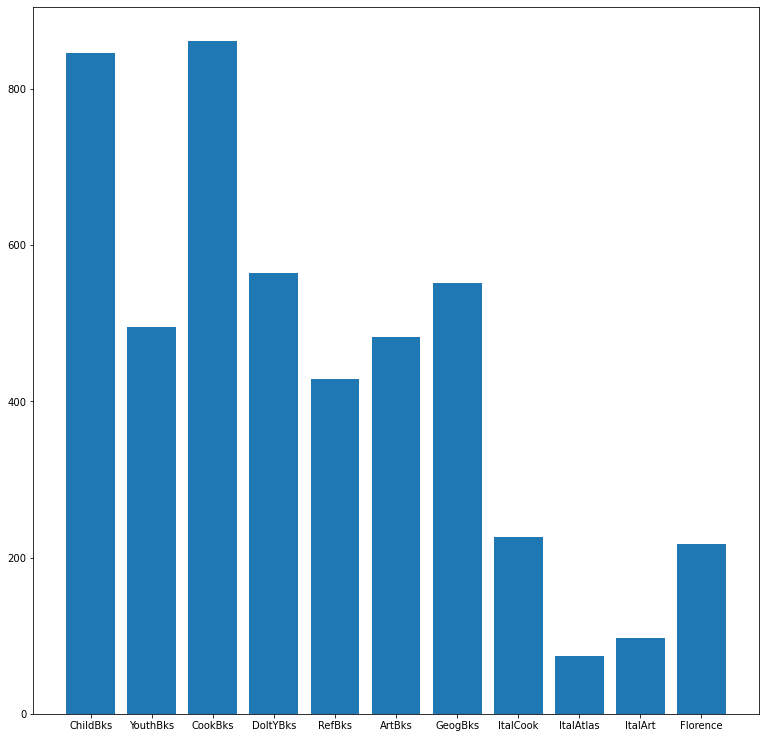

In [8]:
book_count = []
col_names = data.columns
for col_name in col_names:
    book_count.append(data[col_name].value_counts()[1])
    
plt.bar(col_names, book_count)


### Apriori Algorithm for min_support  = 0.1 

In [9]:
frequent_itemsets1 = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets1 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [10]:
frequent_itemsets1 = apriori(data, min_support = 0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


#### Rules when min_support = 0.1 and min_threshold for lift is 0.5 

In [11]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [12]:
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


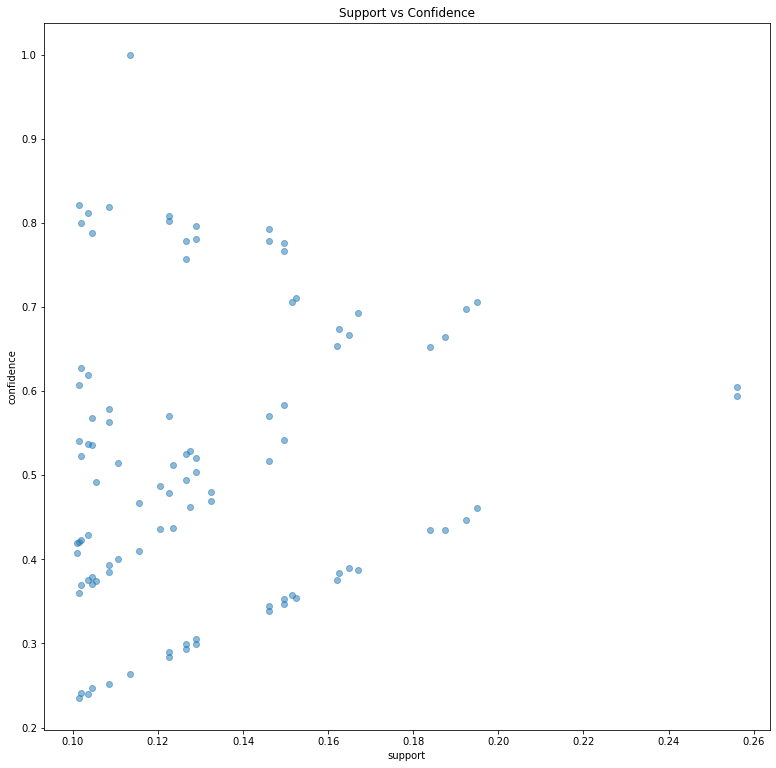

In [13]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [14]:
rules2 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [15]:
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
40,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
43,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
46,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
25,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
24,"(RefBks, CookBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083
37,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000
16,"(YouthBks, CookBks)",(ChildBks),0.1620,0.4230,0.1290,0.796296,1.882497,0.060474,2.832545
22,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
34,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.4230,0.1045,0.788679,1.864490,0.048452,2.730446


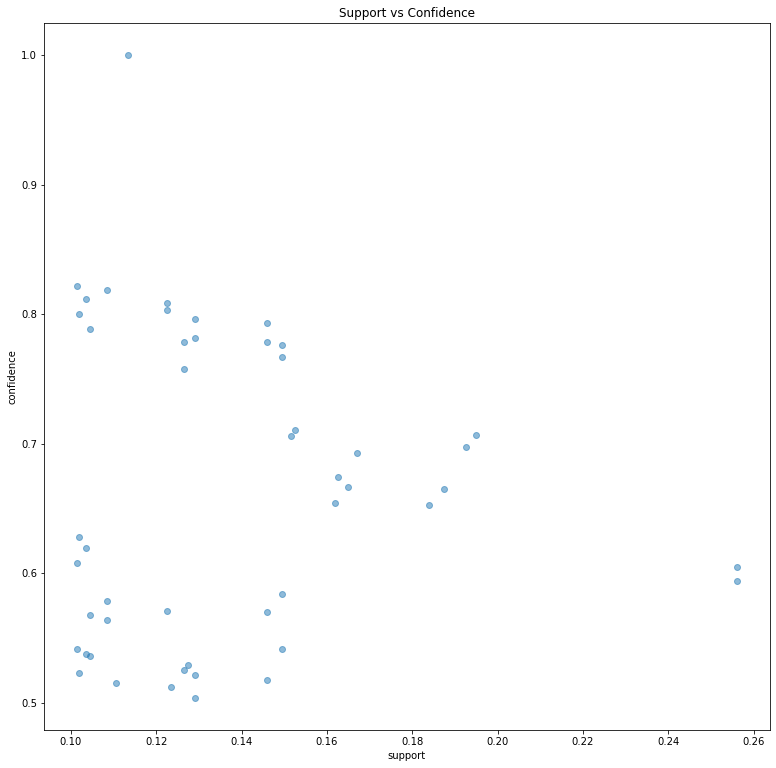

In [16]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Apriori Algorithm for min_support = 0.2 

In [17]:
frequent_itemsets2 = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [18]:
frequent_itemsets2 = apriori(data, min_support = 0.2, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


#### Rules when min_support = 0.2 and min_threshold for lift is 0.5

In [19]:
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


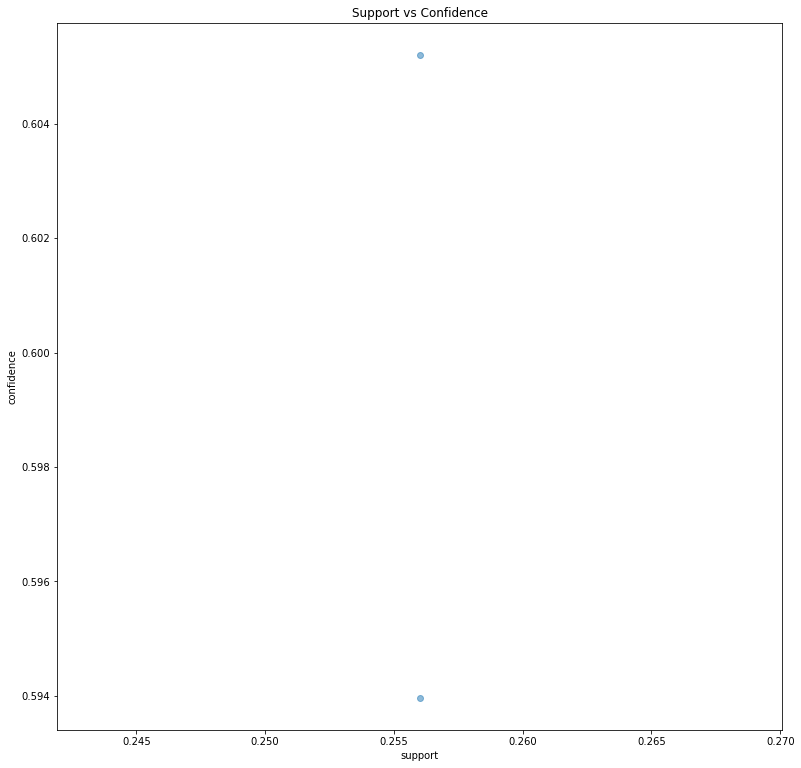

In [20]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [21]:
rules4 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [22]:
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


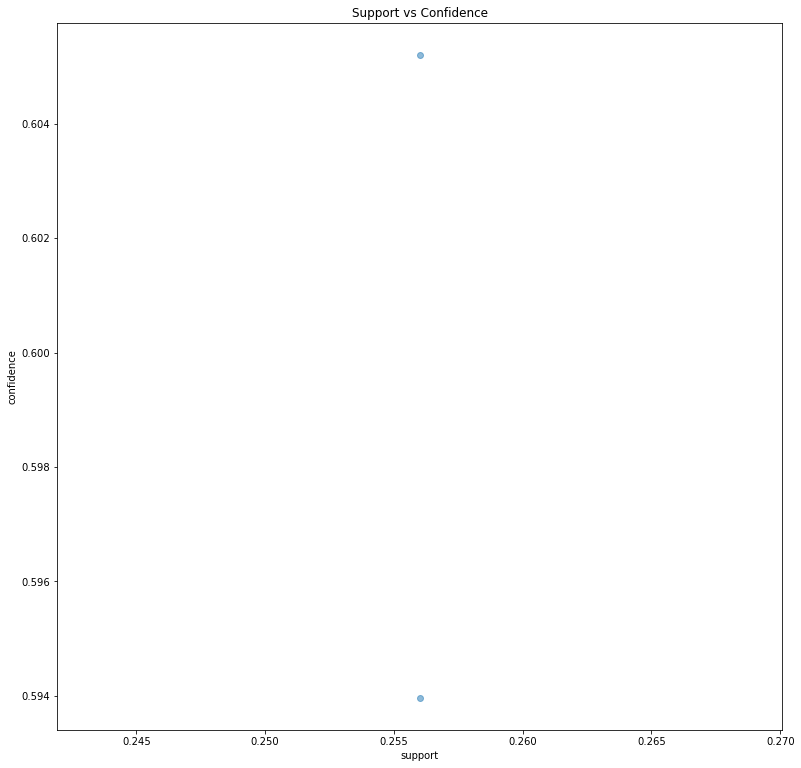

In [23]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()